In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import seaborn as sn


In [15]:
df = pd.read_csv('Training.csv')
x_train = df.drop(columns=['class'])
y_train= df['class']
y_trainsample = y_train.head(100)


In [4]:
for column in x_train.columns:
    if x_train[column].dtype==type(object):
         labelencoder = LabelEncoder()
         x_train[column] = labelencoder.fit_transform(x_train[column])
x_trainsample = x_train.head(100)
x_train

,duration,Type,mode,len,IP,len.1,src_IP,dst_IP,count requests,len.2
0,0,0,0,6,0,4,5,0,6,28
1,1,0,0,6,0,4,4,0,5,28
2,2,0,0,6,0,4,12,0,6,28
3,3,0,0,6,0,4,22,0,5,28
4,4,0,0,6,0,4,0,0,6,28
...,...,...,...,...,...,...,...,...,...,...
58,57,0,0,6,0,4,17,0,6,28
59,58,0,0,6,0,4,11,0,6,28
60,59,0,0,6,0,4,36,0,6,28
61,60,0,0,6,0,4,54,0,6,28


In [5]:
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y_trainsample)


In [6]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_trainsample, y)

SVC(kernel='linear')

In [17]:
df2 = pd.read_csv('Test.csv')
x1 = df2.drop(columns = ['class'])
y1= df2['class']
y2 = y1.head(100)
x1.head(100)


,duration,Type,mode,len,IP,len.1,src_IP,dst_IP,count requests,len.2
0,23:08:19.369122,"ARP,",Ethernet,6,IPv4,4,10.0.0.43,10.0.0.1,17,28
1,23:08:19.537579,"ARP,",Ethernet,6,IPv4,4,10.0.0.20,10.0.0.1,11,28
2,23:08:20.208697,"ARP,",Ethernet,6,IPv4,4,10.0.0.15,10.0.0.1,5,28
3,23:08:20.380862,"ARP,",Ethernet,6,IPv4,4,10.0.0.14,10.0.0.1,3,28
4,23:08:20.556927,"ARP,",Ethernet,6,IPv4,4,10.0.0.21,10.0.0.1,5,28
...,...,...,...,...,...,...,...,...,...,...
58,23:08:19.709037,"ARP,",Ethernet,6,IPv4,4,10.0.0.6,10.0.0.1,10,28
59,23:08:19.873976,"ARP,",Ethernet,6,IPv4,4,10.0.0.26,10.0.0.1,7,28
60,23:08:48.928825,"ARP,",Ethernet,6,IPv4,4,10.0.0.17,10.0.0.1,10,28
61,23:10:30.481260,"ARP,",Ethernet,6,IPv4,4,10.0.0.61,10.0.0.1,4,28


In [8]:
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])


In [9]:
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])


In [10]:
labelencoder = LabelEncoder()

y_test = labelencoder.fit_transform(y2)


In [11]:
x_test = x1.head(100)
y_pred = svclassifier.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[38  2]
 [12 11]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        40
           1       0.85      0.48      0.61        23

    accuracy                           0.78        63
   macro avg       0.80      0.71      0.73        63
weighted avg       0.79      0.78      0.76        63



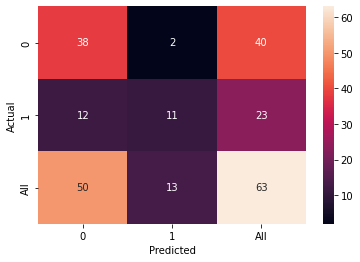

In [14]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(cm, annot=True)
plt.show()